In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

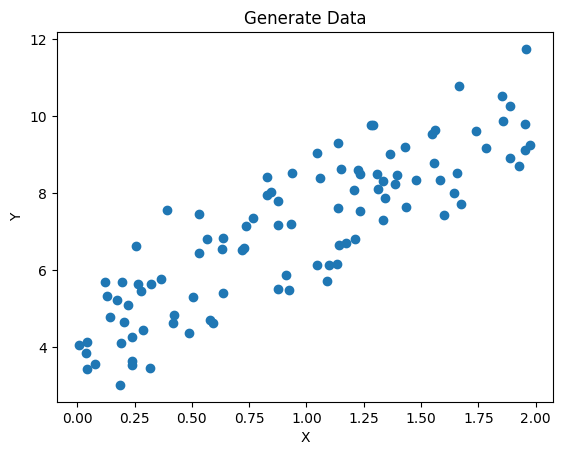

In [13]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.title("Generate Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Mean Squared Error: 0.9177532469714291


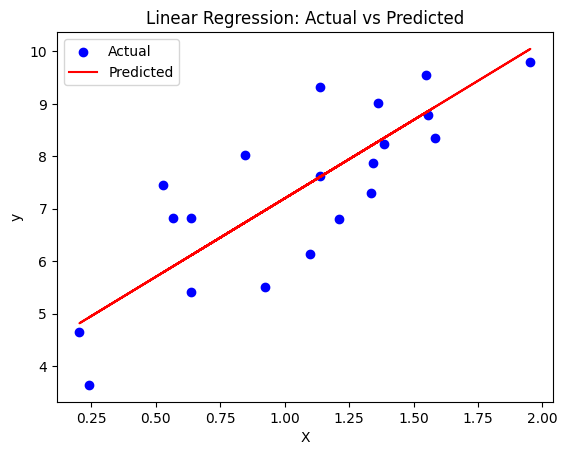

In [15]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_test, y_pred, color='red', label="Predicted")
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

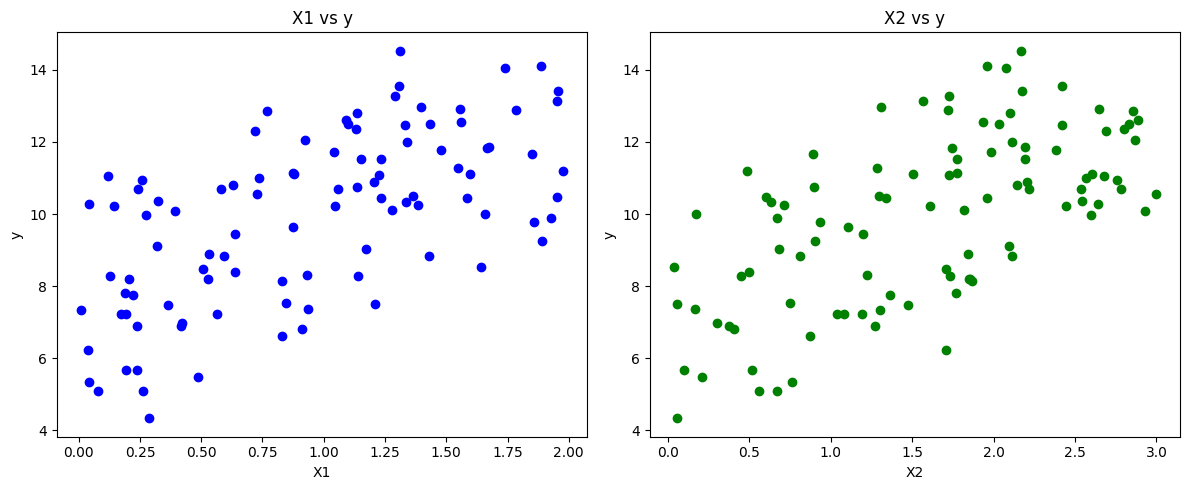

In [16]:
np.random.seed(0)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)

X = np.hstack([X1, X2])

y = 4 + 3 * X1 + 2 * X2 + np.random.randn(100, 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(X1, y, color='blue')
ax[0].set_title("X1 vs y")
ax[0].set_xlabel("X1")
ax[0].set_ylabel("y")

ax[1].scatter(X2, y, color='green')
ax[1].set_title("X2 vs y")
ax[1].set_xlabel("X2")
ax[1].set_ylabel("y")

plt.tight_layout()
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Coefficient:", model.coef_)
print("Model Intercept:", model.intercept_)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Model Coefficient: [[2.70071288 1.95412294]]
Model Intercept: [4.20881601]
Mean Squared Error: 0.7253054416451983


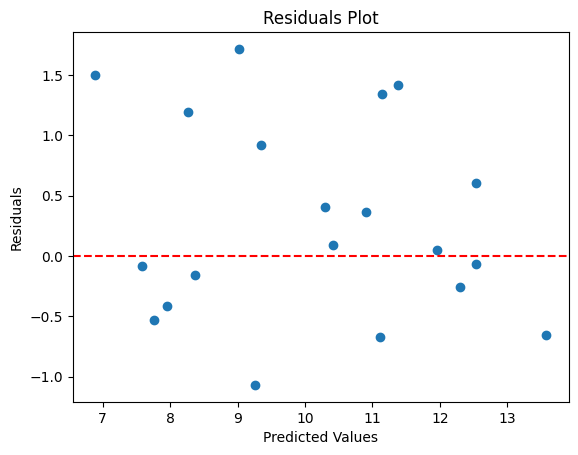

In [18]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Mean Squared Error (Polinomial Regression): 0.698652640438821


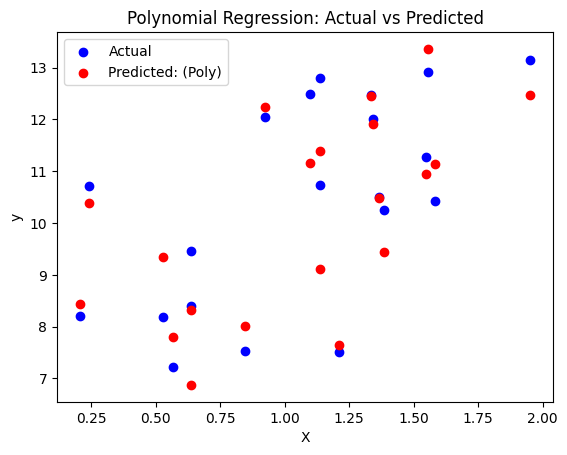

In [19]:
from sklearn.preprocessing import PolynomialFeatures

# add degree 2 polinomial figures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split in to training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# train model with polinomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# predict and evaluate
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Mean Squared Error (Polinomial Regression): {mse_poly}")

#visualization
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred_poly, color='red', label='Predicted: (Poly)')
plt.title("Polynomial Regression: Actual vs Predicted")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [20]:
from sklearn.model_selection import cross_val_score

# cross validation
scores = cross_val_score(model_poly, X_poly, y, cv=5, scoring='neg_mean_squared_error')

# calculate mean
mean_score = np.mean(scores)
print(f"Cross-Validation Mean MSE: {-mean_score}")

Cross-Validation Mean MSE: 0.8977263846990875
